# Наивный байесовский классификатор
Наивный байесовский :классификатор (Na!ve Bayes classifier) - это простой
классификатор, основанный на использовании теоремы Байеса, которая
описывает вероятность собьпия с учетом связанных с ним условий. Такой
классификатор создается посредством присваивания меток классов экземплярам
задачи. Последние представляются в виде векторов значений признаков.
При этом предполаrается, что значение любого заданного признака не
зависит от значений друrих признаков. Эго предположение о независимости
рассматриваемых признаков и составляет наивную часть байесовского классификатора.
Мы можем оценивать влияние любого признака переменной класса независимо
от влияния друrих признаков. Например, мы можем считать животное
гепардом, если оно имеет пятнистую кожу, четыре лапы и хвост и
развивает скорость, равную примерно 70 миль в час. В случае использования
наивного байесовского классификатора считается, что каждый из признаков
вносит независимый вклад в конечный результат, оценивающий вероятность
того, что животное является гепардом. Мы не будем утруждать себя рассмотрением
корреляции между рисунком кожи, количеством лап, наличием
хвоста и скоростью перемещения.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import validation 
from utilities import visualize_classifier
from sklearn.model_selection import train_test_split

качестве источника данных мы будем использовать файл da ta mul ti var _ nb. txt, каждая строка которого содержит значения, разделенные
запятой.

In [7]:
input_file = 'data_multivar_nb.txt'

data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]
# разбивка данных на обучающий и тестовый набор 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, 
                                                    train_size=0.67, 
                                                    random_state=42, shuffle = True ) # shuffle премешивание 

Создадим экземпляр наивною байесовскою классификатора. В данном
случае мы будем использовать гауссовский наивный байесовский классификатор,
в котором предполагается, что значения, ассоциируемые с каждым классом,
следуют закону распределения Гаусса.

In [8]:
classifier = GaussianNB()
# train
classifier.fit(X,y)
# прогнозирование значений для тренировочнных данных
y_pred = classifier.predict(X)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 1. 2. 1. 0. 1. 2. 2. 2. 1. 1. 0. 0. 0. 2. 2. 0. 3. 1. 1. 3. 3. 3.
 0. 0. 2. 1. 2. 0. 3. 1. 1. 1. 0. 0. 1. 2. 2. 1. 1. 3. 0. 1. 2. 2. 0. 1.
 2. 1. 2. 1. 2. 2. 2. 3. 3. 0. 2. 0. 0. 2. 3. 2. 1. 3. 0. 0. 2. 1. 0. 0.
 1. 1. 0. 2. 3. 1. 0. 1. 3. 2. 2. 2. 2. 3. 0. 1. 0. 2. 1. 3. 2. 0. 0. 2.
 1. 0. 3. 3. 3. 2. 0. 2. 1. 3. 3. 1. 3. 1. 3. 3. 0. 2. 1. 0. 3. 1. 1. 1.
 1. 1. 1. 3. 0. 3. 3. 0. 3. 1. 3. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Accuracy pf Naive Bayes classifier = 99.75 %


c:\Users\Игорь\Documents\MyGamesR\work_now\Artificial-Intelligence-with-Python-master\artifical_intel_ipynb\proj_1\utilities.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)


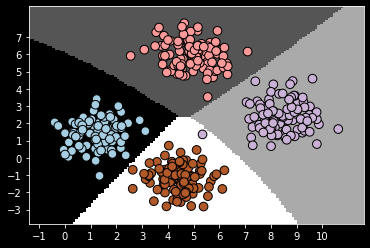

In [5]:
# вычислим качевство(accuracy) классификатора
# сравним предсказания с истиными значениями 
# а затем визуализурием
# вычислим качевство классификатора
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print("Accuracy pf Naive Bayes classifier =", round(accuracy, 2), "%")
visualize_classifier(classifier, X, y) 

Предыдущий метод вычисления качества классификатора не является надежным.
Нам нужно выполнить перекрестную проверку, чтобы не использовать
те же самые тренировочные данные при тестировании.
Разобьем данные на обучающий и тестовый наборы. В соответствии со
значением параметра test_size, указанным в строке кода ниже, мы отнесем
80% данных к тренировке, а оставшиеся 20% - к тестированию. Затем мы выполним
тренировку наивною байесовскою классификатора на этих данных.